# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [468]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
# import libraries
import numpy as np
import torch
import torch.nn as nn  # nn = neural network
from rich import print
from rich.console import Console
from rich.panel import Panel
import sys

sys.path.append(r"C:\Python\UDEMY - DeepUnderstandingOfDeepLearning\myUtils")  # add myUtils to path
import myGraph  # import myGraph

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")  # set plot format to svg
console = Console()

In [469]:
# create data
N = 30
x = torch.randn(N, 1)  # the arguments are the dimensions of the tensor (rows, columns)
y = x + torch.randn(N, 1) / 2
print(f"x: = {x[:5]}...")
print(f"y: = {y[:5]}...")

x: = tensor([[ 0.5331],
        [-0.3395],
        [ 0.1893],
        [ 0.0794],
        [-2.3986]])...

y: = tensor([[ 0.9020],
        [-0.1278],
        [ 0.5619],
        [-0.0385],
        [-1.7432]])...

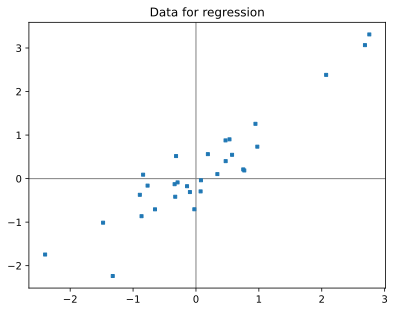

In [470]:
plt.title("Data for regression")
myGraph.showAxes(plt)
plt.plot(x, y, "s", markersize=3)
plt.show()

In [471]:
# build model
model = nn.Sequential(
    nn.Linear(1, 1),  # input layer: 1 input feature, 1 output feature, bias = True (default)
    nn.ReLU(),  # activation function
    nn.Linear(1, 1),  # input layer: 1 input feature, 1 output feature, bias = True (default)
    nn.ReLU(),  # activation function
    nn.Linear(1, 1),  # output layer: 1 input feature, 1 output feature, bias = True (default) 
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
)

In [472]:
# learning rate
learningRate = 0.05

# loss function
lossfun = nn.MSELoss()  # mean squared error loss

# optimizer (the flavor of gradient descent to implement: Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

x.shape = torch.Size([30, 1])
y.shape = torch.Size([30, 1])

losses[:5] = tensor([0., 0., 0., 0., 0.])...

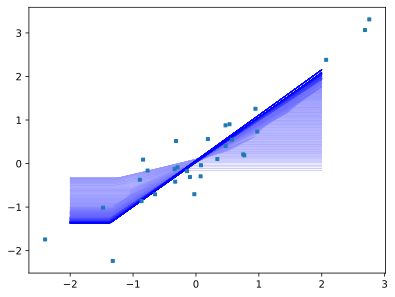

In [473]:
# train the model
num_epochs = 500
losses = torch.zeros(num_epochs)

print(f'x.shape = {x.shape}\ny.shape = {y.shape}')
print(f'losses[:5] = {losses[:5]}...')

xPlot = torch.linspace(-2, 2, 100).reshape(-1, 1)  # 100 points between -3 and 3

## Train the model!
for epoch_i in range(num_epochs):
    # forward pass
    yHat = model(x)
    yPlot = model(xPlot)
    
    rg = 0.6*(1-epoch_i/num_epochs)

    plt.plot(xPlot, yPlot.detach(), "-", color=(rg, rg, 1), linewidth=0.5)  # detach() removes the gradient information

    # compute loss
    loss = lossfun(yHat, y)
    
    # store loss (for plotting)
    losses[epoch_i] = loss

    # backprop. The gradient is calculated with respect to the parameters. To do this, we need to call loss.backward() and then optimizer.step().
    optimizer.zero_grad()  # zero out gradients (otherwise they are accumulated)
    loss.backward()  # compute gradients via backprop (chain rule). Gradients are stored in the .grad attribute of each parameter. 
    optimizer.step()  # take a step in the direction of the negative gradient
    
plt.plot(x, y, "s", markersize=3)
plt.show()


In [474]:
# print(f'L1 weight: {model[0].weight.item()}')  # weight of first layer
# print(f'L1 bias: {model[0].bias.item()}')  # bias of first layer

# print(f"ACTIVATION FUNCTION: {model[1]}")

# print(f'L2 weight: {model[2].weight.item()}')  # weight of second layer
# print(f'L2 bias: {model[2].bias.item()}')  # bias of second layer

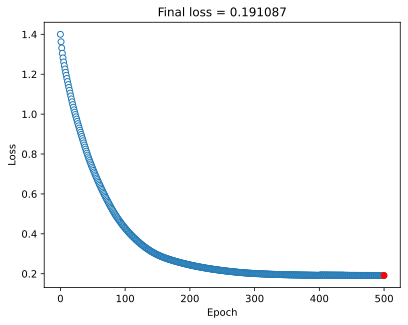

In [475]:
# show the losses

# manually compute losses
# final forward pass
predictions = model(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(num_epochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final loss = %g" % testloss.item())
plt.show()

In [476]:
testloss.item()

0.1910865604877472

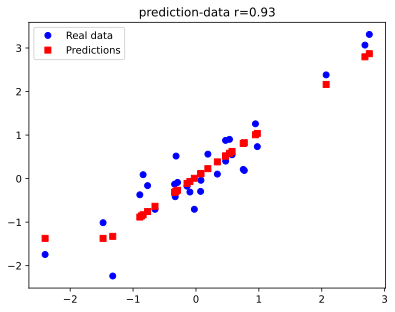

In [477]:
# plot the data
plt.plot(x, y, "bo", label="Real data")
plt.plot(x, predictions.detach(), "rs", label="Predictions")
plt.title(f"prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0, 1]:.2f}")
plt.legend()
plt.show()

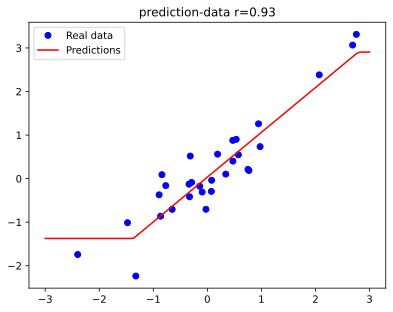

In [478]:
xNew = torch.linspace(-3, 3, 100).reshape(-1, 1)
yNew = model(xNew)

plt.plot(x, y, "bo", label="Real data")
plt.plot(xNew, yNew.detach(), "r-", label="Predictions")
plt.title(f"prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0, 1]:.2f}")
plt.legend()
plt.show()

# Additional explorations

In [479]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.